In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('SuperStore_Orders.csv')

In [4]:
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,2011
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,2011
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,2011
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,4.82,High,2011
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,31-12-2014,04-01-2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,31-12-2014,05-01-2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,31-12-2014,02-01-2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,06-01-2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014


In [5]:
df.shape

(51290, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [15]:
# If commas are thousand separators, remove them
df['sales'] = df['sales'].str.replace(',', '', regex=False)

# Convert to numeric
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')

print("Mean Sales:", df['sales'].mean())
print("Median Sales:", df['sales'].median())
print("Mode Sales:", df['sales'].mode()[0])


Mean Sales: 246.49844024176252
Median Sales: 85.0
Mode Sales: 13


In [16]:
print("\nSales Variance:", df['sales'].var())
print("Sales Standard Deviation:", df['sales'].std())


Sales Variance: 237721.74977823094
Sales Standard Deviation: 487.5671746315895


In [17]:
print("Basic Statistics:\n", df[['sales','profit','discount','quantity','shipping_cost']].describe())

Basic Statistics:
               sales        profit      discount      quantity  shipping_cost
count  51290.000000  51290.000000  51290.000000  51290.000000   51290.000000
mean     246.498440     28.641740      0.142908      3.476545      26.375915
std      487.567175    174.424113      0.212280      2.278766      57.296804
min        0.000000  -6599.978000      0.000000      1.000000       0.000000
25%       31.000000      0.000000      0.000000      2.000000       2.610000
50%       85.000000      9.240000      0.000000      3.000000       7.790000
75%      251.000000     36.810000      0.200000      5.000000      24.450000
max    22638.000000   8399.976000      0.850000     14.000000     933.570000


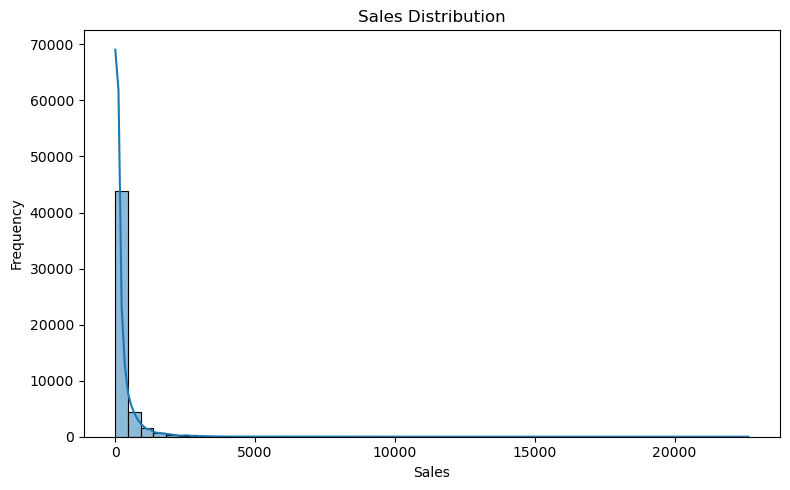

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(df['sales'], bins=50, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

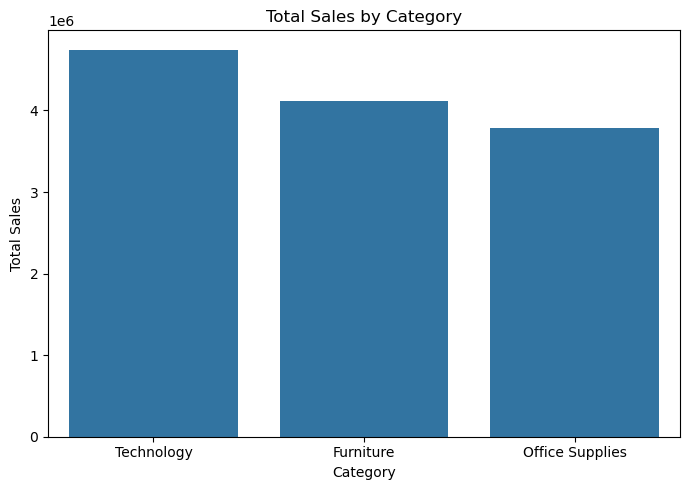

In [23]:
plt.figure(figsize=(7, 5))
category_sales = df.groupby('category')['sales'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()



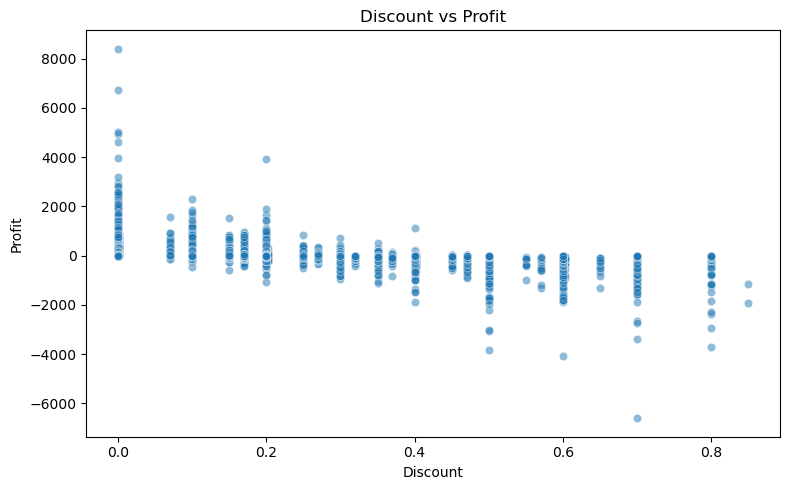

In [25]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='discount', y='profit', alpha=0.5)
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()

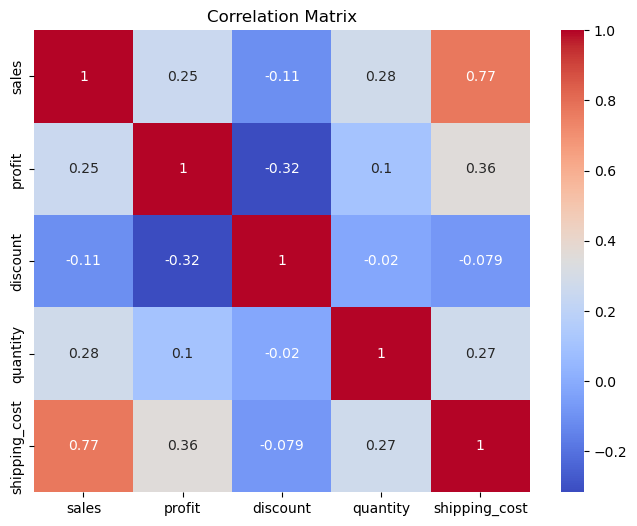

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['sales','profit','discount','quantity','shipping_cost']].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()